### 당뇨병 진행도 예측

#### 데이터셋 불러오기

In [11]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

dataset = load_diabetes()
print(dataset.keys())


df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

print(df.head())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


#### 데이터셋 확인

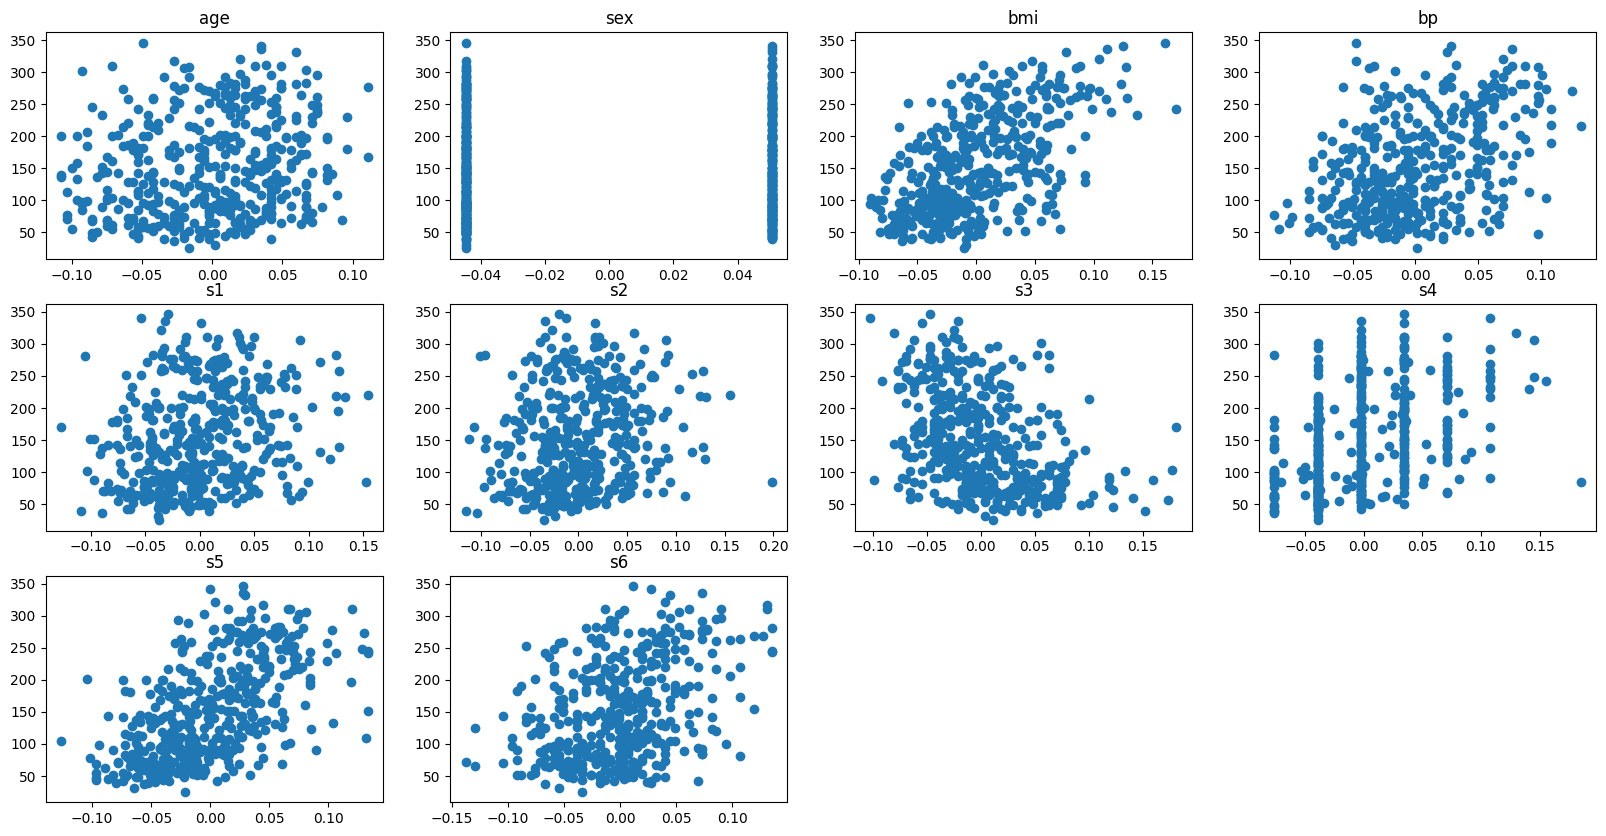

In [16]:
plt.figure(figsize=(20,10))

for i in range(10):
    plt.subplot(3, 4, i + 1)
    plt.scatter(df.iloc[:, i], df['target'])
    plt.title(df.columns[i])
plt.show()

In [22]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(10, 64),
    nn.ReLU(),
    nn.Linear(64,16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

X = torch.FloatTensor(df.iloc[:, :10].values)
Y = torch.FloatTensor(df['target'].values).reshape(-1, 1)


batch_size = 64
learning_rate = 1e-4
epochs = 30000

optimizer = torch.optim.SGD(params=model.parameters(), lr = learning_rate)

for epoch in range(epochs):

    for i in range(len(X) // batch_size):
        start = i * batch_size
        end = start + batch_size

        x = X[start:end]
        y = Y[start:end]

        optimizer.zero_grad()

        pred_y = model(x)

        loss = nn.MSELoss()(pred_y, y)
        loss.backward()
        optimizer.step()

    if epoch % 2000 == 0:
        print(f'epoch : {epoch}, loss : {loss.item()}')

epoch : 0, loss : 33460.140625
epoch : 2000, loss : 3144.285400390625
epoch : 4000, loss : 2855.952880859375
epoch : 6000, loss : 2782.244140625
epoch : 8000, loss : 2662.16552734375
epoch : 10000, loss : 2214.49755859375
epoch : 12000, loss : 1593.837158203125
epoch : 14000, loss : 2752.855224609375
epoch : 16000, loss : 2235.011474609375
epoch : 18000, loss : 1014.8696899414062
epoch : 20000, loss : 1095.771240234375
epoch : 22000, loss : 474.2247314453125
epoch : 24000, loss : 408.0931701660156
epoch : 26000, loss : 225.77195739746094
epoch : 28000, loss : 690.240478515625


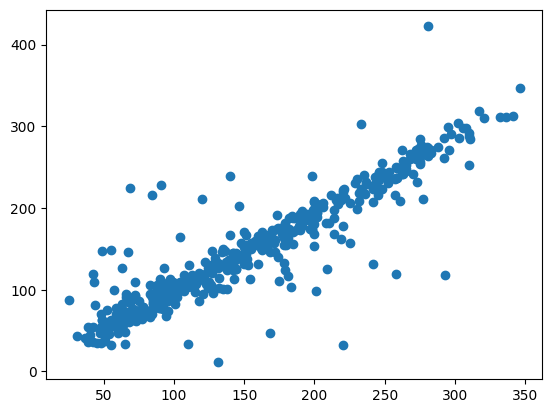

In [23]:
import matplotlib.pyplot as plt

pred = model(torch.FloatTensor(X))
plt.scatter(Y.numpy(), pred.reshape(1, -1).clone().detach().numpy())

In [26]:
pred = model(torch.FloatTensor(X))

mae = (pred - Y).abs().mean()
rmse = ((pred - Y) ** 2).mean().sqrt()

print(f"MAE : {mae}, RMSE : {rmse}")

MAE : 17.625734329223633, RMSE : 31.179004669189453


#### 위 성능 비교를 위해 훈련하지 않는 모델의 예측 값으로 평가지표 구하기

MAE : 152.15858459472656, RMSE : 170.53555297851562


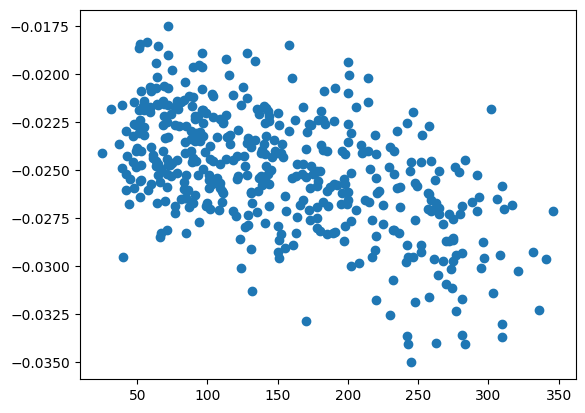

In [27]:
untrained_model = nn.Sequential(
    nn.Linear(10, 64),
    nn.ReLU(),
    nn.Linear(64,16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

pred = untrained_model(torch.FloatTensor(X))
plt.scatter(Y.numpy(), pred.reshape(1, -1).clone().detach().numpy())

pred = untrained_model(torch.FloatTensor(X))

mae = (pred - Y).abs().mean()
rmse = ((pred - Y) ** 2).mean().sqrt()

print(f"MAE : {mae}, RMSE : {rmse}")